## Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={"figure.figsize":(15, 8)})

In [2]:
filePath = 'Zadanie_rekrutacyjne.csv'
df = pd.read_csv(filePath, sep=';')
df.drop(columns=['Unnamed: 0'], inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'Zadanie_rekrutacyjne.csv'

## Eksploracja danych

In [ ]:
df.head()

,Zummi,Gruffi,Grammi,Tummi,Sunni,Cubbi,Sir Thornberry,Gusto,Chummi,Sir Gallant
0,Nie Widział,Nie Widział,Nie Widział,Nie Widział,Widział,Widział,Nie Widział,Nie Widział,Nie Widział,Nie Widział
1,Widział,Nie Widział,Widział,Widział,Widział,Widział,Nie Widział,Widział,Nie Widział,Widział
2,Widział,Nie Widział,Widział,Nie Widział,Widział,Widział,Widział,Widział,Nie Widział,Widział
3,Nie Widział,Nie Widział,Nie Widział,Widział,Widział,Nie Widział,Nie Widział,Nie Widział,Nie Widział,Nie Widział
4,Widział,Widział,Widział,Nie Widział,Nie Widział,Widział,Nie Widział,Nie Widział,Widział,Widział


In [ ]:
df.describe()

,Zummi,Gruffi,Grammi,Tummi,Sunni,Cubbi,Sir Thornberry,Gusto,Chummi,Sir Gallant
count,984,984,979,989,979,985,985,987,982,986
unique,7,7,7,7,7,7,7,7,7,7
top,Nie Widział,Nie Widział,Nie Widział,Nie Widział,Nie Widział,Nie Widział,Nie Widział,Nie Widział,Nie Widział,Nie Widział
freq,493,479,523,502,475,511,500,512,491,486


In [ ]:
df.shape

(1000, 10)

In [ ]:
for column in df.columns:
    print(f'{column}: {df[column].value_counts()}')

Zummi: Zummi
Nie Widział    493
Widział        419
Widzial         22
nie widzial     18
Widzi al        11
tak             11
nie             10
Name: count, dtype: int64
Gruffi: Gruffi
Nie Widział    479
Widział        428
nie widzial     28
Widzial         27
nie             12
Widzi al         6
tak              4
Name: count, dtype: int64
Grammi: Grammi
Nie Widział    523
Widział        378
nie widzial     25
Widzial         24
nie             15
tak              7
Widzi al         7
Name: count, dtype: int64
Tummi: Tummi
Nie Widział    502
Widział        396
Widzial         29
nie widzial     21
tak             20
Widzi al        12
nie              9
Name: count, dtype: int64
Sunni: Sunni
Nie Widział    475
Widział        410
Widzial         36
nie widzial     23
nie             12
Widzi al        12
tak             11
Name: count, dtype: int64
Cubbi: Cubbi
Nie Widział    511
Widział        394
nie widzial     30
Widzial         26
tak             10
Widzi al         8
nie      

Czyszczenie błedów kodowania

In [ ]:
replace_map = {
    'Widzial': 'Widział',
    'nie widzial': 'Nie Widział',
    'tak': 'Widział',
    'nie': 'Nie Widział',
    'Widzi al': 'Widział'
}

In [ ]:
for column in df.columns:
    df[column] = df[column].replace(replace_map)

In [ ]:
for column in df.columns:
    print(f'{column}: {df[column].value_counts()}')

Zummi: Zummi
Nie Widział    521
Widział        463
Name: count, dtype: int64
Gruffi: Gruffi
Nie Widział    519
Widział        465
Name: count, dtype: int64
Grammi: Grammi
Nie Widział    563
Widział        416
Name: count, dtype: int64
Tummi: Tummi
Nie Widział    532
Widział        457
Name: count, dtype: int64
Sunni: Sunni
Nie Widział    510
Widział        469
Name: count, dtype: int64
Cubbi: Cubbi
Nie Widział    547
Widział        438
Name: count, dtype: int64
Sir Thornberry: Sir Thornberry
Nie Widział    538
Widział        447
Name: count, dtype: int64
Gusto: Gusto
Nie Widział    541
Widział        446
Name: count, dtype: int64
Chummi: Chummi
Nie Widział    530
Widział        452
Name: count, dtype: int64
Sir Gallant: Sir Gallant
Nie Widział    524
Widział        462
Name: count, dtype: int64


In [ ]:
print(df.isnull().sum())

Zummi             16
Gruffi            16
Grammi            21
Tummi             11
Sunni             21
Cubbi             15
Sir Thornberry    15
Gusto             13
Chummi            18
Sir Gallant       14
dtype: int64


Traktuje brak odpowiedzi jako 'Nie Widział' czyli naszą mode - można uznać, że brak odpowiedzi może się równać za brak znajomości influencera

In [ ]:
for column in df.columns:
    df[column] = df[column].fillna(df[column].mode()[0])

In [ ]:
print(df.isnull().sum())

Zummi             0
Gruffi            0
Grammi            0
Tummi             0
Sunni             0
Cubbi             0
Sir Thornberry    0
Gusto             0
Chummi            0
Sir Gallant       0
dtype: int64


Korelacja miedzy influencerami

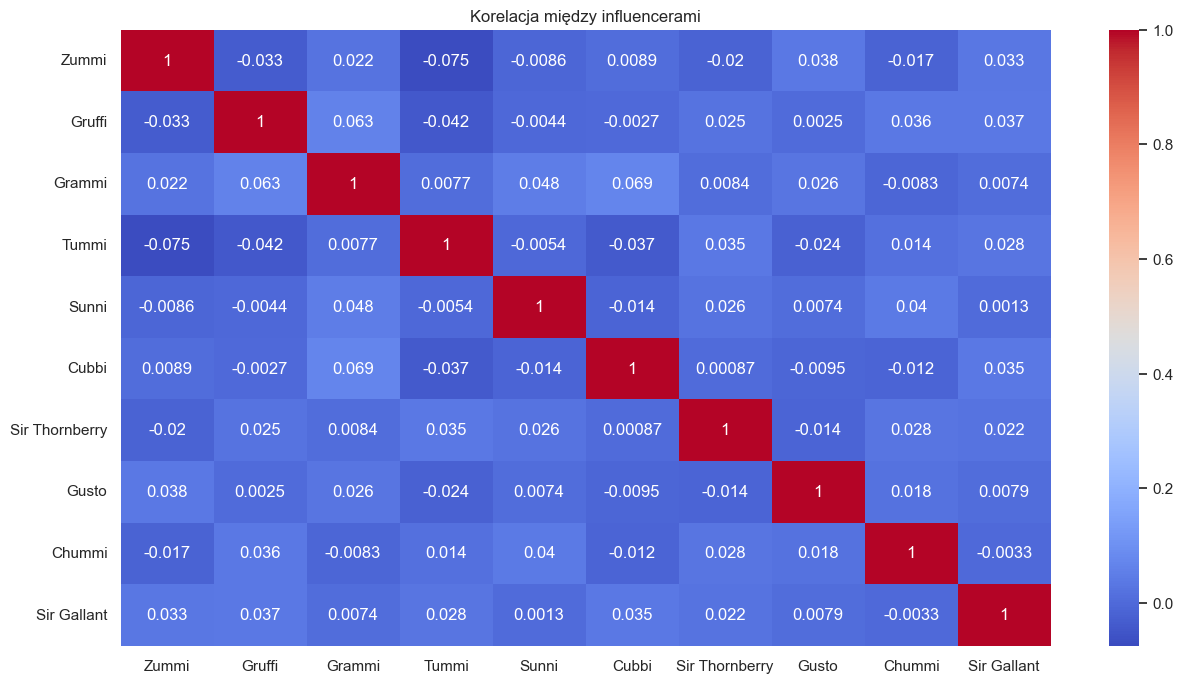

In [ ]:
binary_df = df.map(lambda x: 1 if x == 'Widział' else 0)

sns.heatmap(binary_df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelacja między influencerami')
plt.show()

Zapisanie danych

In [ ]:
df.to_csv('cleaned.csv', index=False)

In [ ]:
df_clean = df

## Zasięg Indywidualny

Pokazanie wskaźnika - Zasięg mediowy

In [ ]:
individual_reach = binary_df.sum() / len(binary_df) * 100
individual_reach_sorted = individual_reach.sort_values(ascending=False)
individual_reach_percent = individual_reach_sorted.apply(lambda x: f'{x:.2f} %')
print(individual_reach_percent)


Sunni             46.90 %
Gruffi            46.50 %
Zummi             46.30 %
Sir Gallant       46.20 %
Tummi             45.70 %
Chummi            45.20 %
Sir Thornberry    44.70 %
Gusto             44.60 %
Cubbi             43.80 %
Grammi            41.60 %
dtype: object


Widok ile potencjalnych klientów zobaczyło reklamę P1

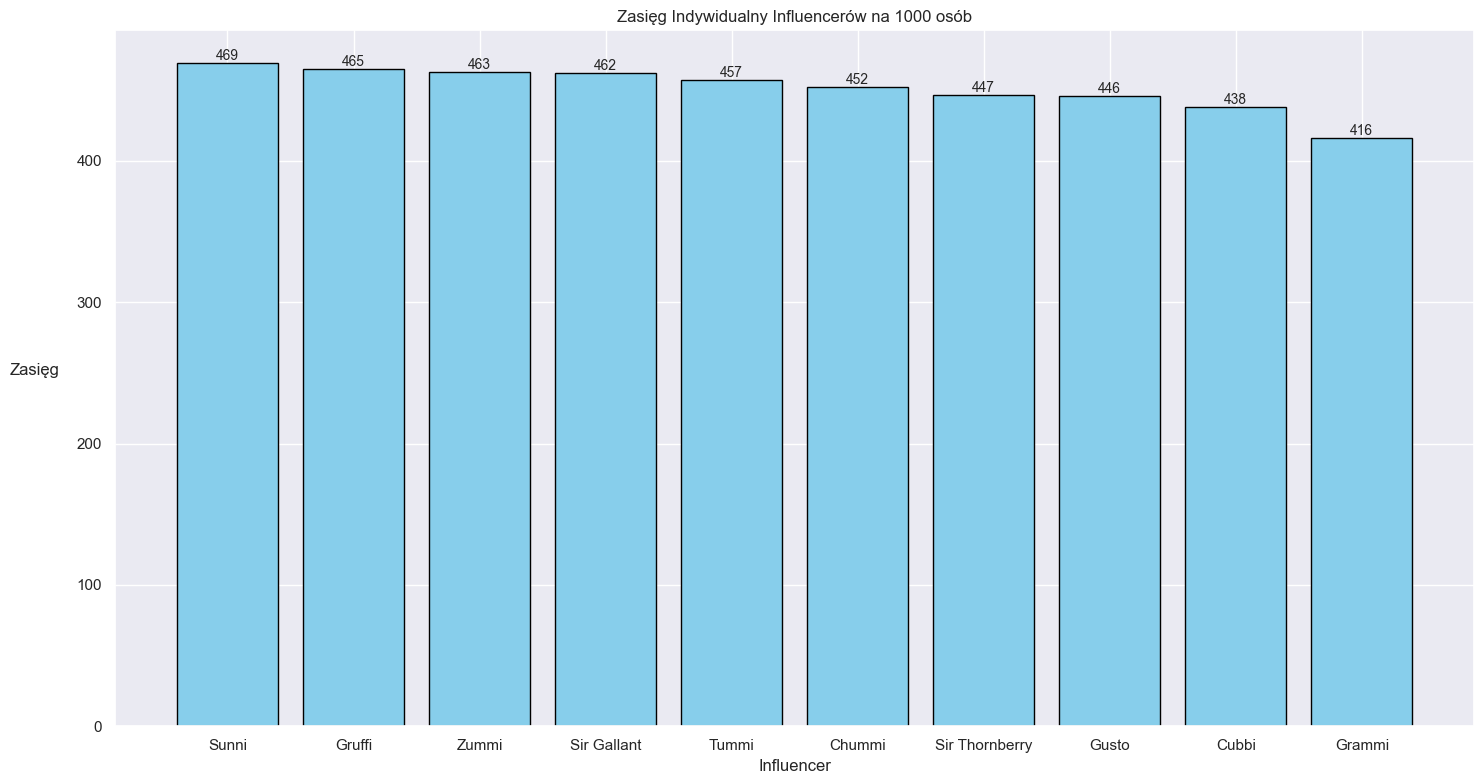

In [ ]:
individual_reach_people = individual_reach_sorted * 10

plt.figure(figsize=(15, 8))
bars = plt.bar(individual_reach_people.index, individual_reach_people.values, color='skyblue', edgecolor='black')

for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom', fontsize=10)

plt.title("Zasięg Indywidualny Influencerów na 1000 osób")
plt.ylabel("Zasięg", rotation=0, labelpad=30)
plt.xlabel("Influencer")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Zasięg Grupowy

Import oraz użycie kombinacji

In [ ]:
from itertools import combinations

In [ ]:
def group_reach(columns):
    return ((df[list(columns)] == 'Widział').any(axis=1).sum() / len(df)) * 100

In [ ]:
group_reaches = {}

for x in range(2, 6):  
    comb_list = list(combinations(df.columns, x))
    group_reaches.update({comb: group_reach(comb) for comb in comb_list})

In [ ]:
sorted_group_reaches = dict(sorted(group_reaches.items(), key=lambda item: item[1], reverse=True))
results_df = pd.DataFrame(list(sorted_group_reaches.items()), columns=['Kombinacja', 'Zasięg (%)'])
results_df

,Kombinacja,Zasięg (%)
0,"(Zummi, Gruffi, Tummi, Sir Thornberry, Gusto)",96.7
1,"(Zummi, Gruffi, Tummi, Sunni, Sir Thornberry)",96.6
2,"(Zummi, Gruffi, Tummi, Sunni, Gusto)",96.5
3,"(Zummi, Tummi, Sunni, Sir Thornberry, Chummi)",96.5
4,"(Zummi, Tummi, Sunni, Cubbi, Sir Thornberry)",96.4
...,...,...
622,"(Grammi, Sunni)",67.8
623,"(Grammi, Sir Thornberry)",67.5
624,"(Gruffi, Grammi)",67.2
625,"(Grammi, Gusto)",67.0


Najlepsze kombinację influencerów

In [ ]:
best_combinations = {
    '5 Influencers': max((comb for comb in sorted_group_reaches if len(comb) == 5), key=lambda x: sorted_group_reaches[x]),
    '4 Influencers': max((comb for comb in sorted_group_reaches if len(comb) == 4), key=lambda x: sorted_group_reaches[x]),
    '3 Influencers': max((comb for comb in sorted_group_reaches if len(comb) == 3), key=lambda x: sorted_group_reaches[x]),
    '2 Influencers': max((comb for comb in sorted_group_reaches if len(comb) == 2), key=lambda x: sorted_group_reaches[x])
}

for key, comb in best_combinations.items():
    print(f"Najlepsza kombinacja dla {key}: {comb}, Zasięg: {sorted_group_reaches[comb]:.2f}%")

Najlepsza kombinacja dla 5 Influencers: ('Zummi', 'Gruffi', 'Tummi', 'Sir Thornberry', 'Gusto'), Zasięg: 96.70%
Najlepsza kombinacja dla 4 Influencers: ('Zummi', 'Gruffi', 'Tummi', 'Gusto'), Zasięg: 93.30%
Najlepsza kombinacja dla 3 Influencers: ('Zummi', 'Gruffi', 'Tummi'), Zasięg: 86.60%
Najlepsza kombinacja dla 2 Influencers: ('Zummi', 'Tummi'), Zasięg: 72.70%


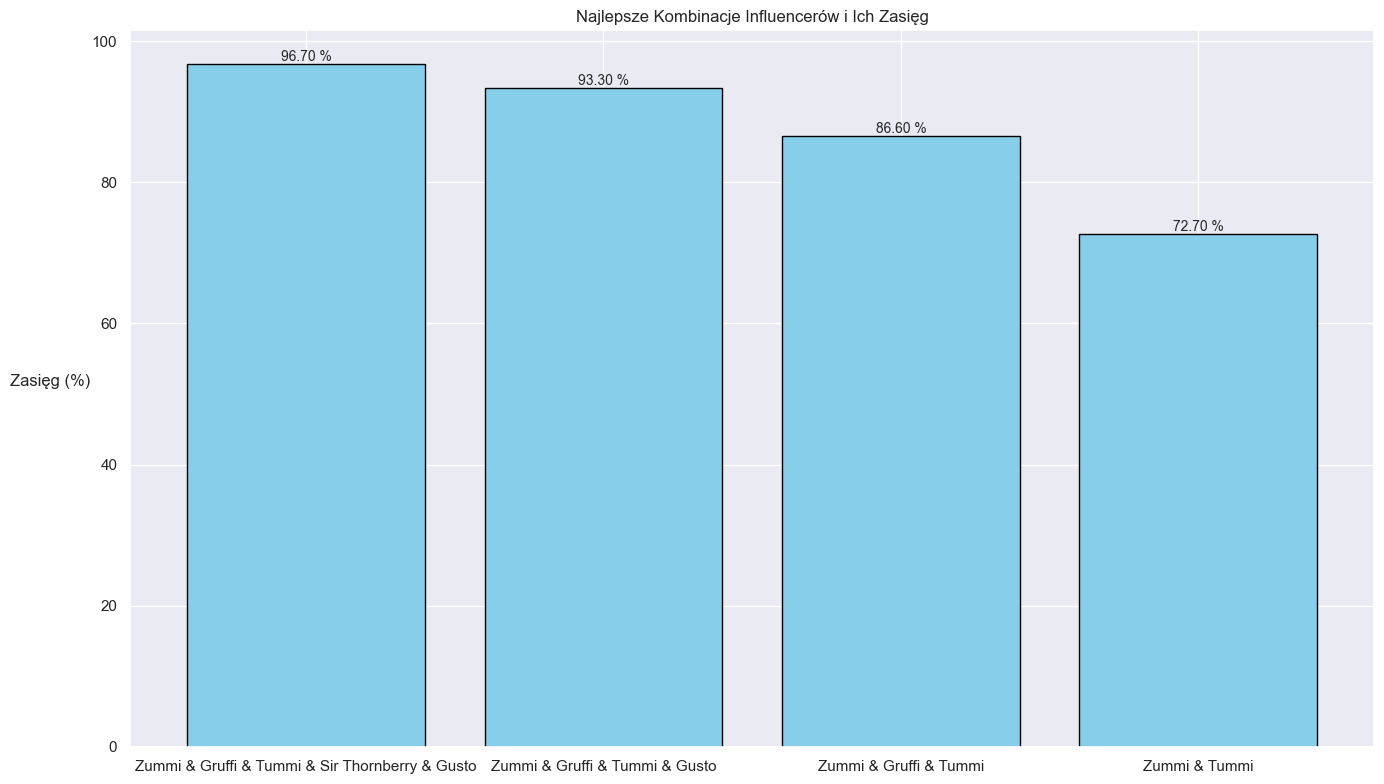

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
labels = [f"{' & '.join(comb)}" for comb in best_combinations.values()]
values = [sorted_group_reaches[comb] for comb in best_combinations.values()]

bars = ax.bar(labels, values, color='skyblue', edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f} %', ha='center', va='bottom', fontsize=10)
    
plt.xticks(rotation=0)
ax.set_ylabel('Zasięg (%)', rotation=0, labelpad=30)
ax.set_title('Najlepsze Kombinacje Influencerów i Ich Zasięg')
plt.tight_layout()
plt.show()

# Podsumowanie

## Podsumowanie Analizy

Dataset zawiera 10 kolumn - 10 różnych influencerów oraz 1000 wierszy - odpowiedzi ludzi odpowiadających na ankiety


W Dataset zostały oczyszczone braki danych oraz błędne kodowanie znormalizowane do [Wiedział/Nie Wiedział], braki danych wynosiły od 11 do 21 dla poszczególnych influencerów najmniej miał Tummi, najwięcej Sunni i zostały zastąpione [Nie Wiedział]

Zasięg indywidaualny influencerów według wskaźnika mediowego wynosi: 
| Influencer       | Zasięg (%) |
|------------------|------------|
| Sunni            | 46.90 %    |
| Gruffi           | 46.50 %    |
| Zummi            | 46.30 %    |
| Sir Gallant      | 46.20 %    |
| Tummi            | 45.70 %    |
| Chummi           | 45.20 %    |
| Sir Thornberry   | 44.70 %    |
| Gusto            | 44.60 %    |
| Cubbi            | 43.80 %    |
| Grammi           | 41.60 %    |

Zasięg grupowy w podziale od 2 do 5 według wskaźnika mediowego wynosi:

| Liczba Influencerów | Influencerzy                                     | Zasięg (%) |
|---------------------|--------------------------------------------------|------------|
| 5                   | Zummi,  Gruffi, Tummi, Sir Thornberry, Gusto     |  96.70 %   |
| 4                   | Zummi, Gruffi, Tummi,  Gusto                     |  93.30 %   |
| 3                   | Zummi, Gruffi, Tummi,                            |  86.60 %   |
| 2                   | Zummi, Tummi                                     |  72.70 %   |

## Rekomendacje Biznesowe

Na podstawie przeprowadzonej analizy, przedsiębiorstwo powinno wybrać tych 5 influencerów do reklamy dla swojego produktu P2: **Zummi**, **Gruffi**, **Tummi**, **Sir Thornberry**, **Gusto** - osiągając wynik **96,7%**.

Rola Zummiego
- Choć Zummi nie osiąga najwyższego zasięgu indywidualnie, jego obecność w grupie znacznie podnosi zasięg kampanii.
- Zalecam zawsze rozważać Zummiego w promocjach produktu przy użyciu influencerów.

Jeśli natomiast przedsiębiorstwo rozważało by podjęcię współpracy z inną ilością blogerów, tabela przedstawia jakie osoby powinnny być wzięte zależnie od ilości osób. 

*Zasięg* - Procent z 1000 ankietowanych osób, które widziały reklame o produkcie P1 

| Liczba Influencerów | Influencerzy                                     | Zasięg (%) |
|---------------------|--------------------------------------------------|------------|
| 5                   | Zummi,  Gruffi, Tummi, Sir Thornberry, Gusto     |  96.70 %   |
| 4                   | Zummi, Gruffi, Tummi,  Gusto                     |  93.30 %   |
| 3                   | Zummi, Gruffi, Tummi,                            |  86.60 %   |
| 2                   | Zummi, Tummi                                     |  72.70 %   |

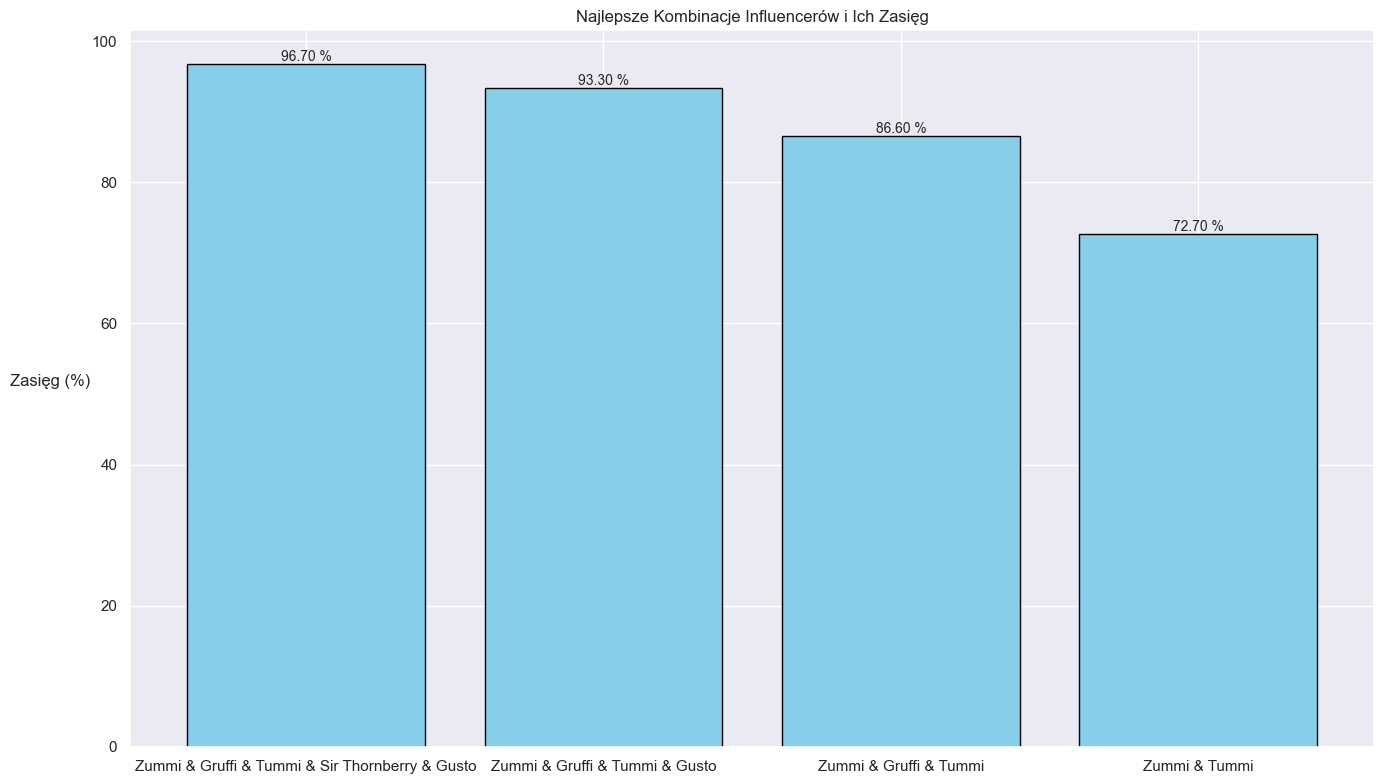